# Проект "Оценка результатов A/B-теста по введению нового рекламного баннера"

<p align="center"><img src="https://top-fon.com/uploads/posts/2023-01/1674856849_top-fon-com-p-fon-dlya-prezentatsii-shopping-159.jpg" width="600" height="400" /></p>

**Описание исследования:** Интернет-магазин разработал новый рекламный баннер для увеличения количества покупок. В целях оценки целесообразности введения нового рекламного баннера принято решение о проведении A/B-теста в период с 01.08.2019 по 30.08.2019. По результатам введения изменений ожидается увидеть рост конверсии из уникальных показов рекламы в покупки.

**Задача исследования:** Представлены результаты проведения A/B-теста, необходимо оценить изменение целовой метрики (принять решение о целесообразности введения нового баннера).

**Используемые инструменты:** Python (pandas (работа с пропусками, типами данных, объединение таблиц, группировка), numpy (применение статического критерия), seaborn, matplotlib (визуалиция данных: построение воронки продаж))

**Результат:** С введением нового рекламного баннера пользователи стали больше покупать (конверсия в тестовой группе выше на 64%, чем в контрольной), хотя количество уникальных показов рекламы снизилось на 40%. Также статистический критерий показал увеличение конверсии из уникальных показов рекламы в покупки.

Датасеты взяты с сайта Kaggle.com https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset%

In [1]:
# импортируемые необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных и общая информация о них.

У нас 2 (два) датасета: данные по контрольной и тестовой группам. Загрузим их.

In [2]:
control = pd.read_csv('....csv', sep=';')
test = pd.read_csv('....csv', sep=';')

Посмотрим на данные по контрольной группе с помощью метода head().

In [3]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Переименуем для удобства названия столбцов. 

In [4]:
control = control.rename(columns={'Campaign Name': 'group', 'Date': 'date', 'Spend [USD]':'spend_money',\
                        '# of Impressions':'impressions_ad', 'Reach':'unique_impressions_ad',\
                        '# of Website Clicks':'clicks_ad', '# of Searches':'searches_on_website',\
                        '# of View Content':'view_on_website', '# of Add to Cart':'add_cart',\
                        '# of Purchase':'purchase'})
control.head()

,group,date,spend_money,impressions_ad,unique_impressions_ad,clicks_ad,searches_on_website,view_on_website,add_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вызовем метод info(), чтобы увидеть основную информацию о данных, а тажке атрибут shape (сведения о размере датасета).

In [5]:
control.info()
control.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  30 non-null     object 
 1   date                   30 non-null     object 
 2   spend_money            30 non-null     int64  
 3   impressions_ad         29 non-null     float64
 4   unique_impressions_ad  29 non-null     float64
 5   clicks_ad              29 non-null     float64
 6   searches_on_website    29 non-null     float64
 7   view_on_website        29 non-null     float64
 8   add_cart               29 non-null     float64
 9   purchase               29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


(30, 10)

Как видно, датасет содержит 30 строк, при этом, в части столбцов в одной строке есть пропущенные значения.

**Перейдём к датасету по тестовой группе A/B-теста.**

In [6]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Посмотрим на данные по тестовой группе с помощью метода head().

In [7]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Переименуем для удобства названия столбцов. 

In [8]:
test = test.rename(columns={'Campaign Name': 'group', 'Date': 'date', 'Spend [USD]':'spend_money',\
                            '# of Impressions':'impressions_ad', 'Reach':'unique_impressions_ad',\
                            '# of Website Clicks':'clicks_ad', '# of Searches':'searches_on_website',\
                            '# of View Content':'view_on_website', '# of Add to Cart':'add_cart',\
                            '# of Purchase':'purchase'})
test.head()

,group,date,spend_money,impressions_ad,unique_impressions_ad,clicks_ad,searches_on_website,view_on_website,add_cart,purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Вызовем метод info(), чтобы увидеть основную информацию о данных, а тажке атрибут shape (сведения о размере датасета).

In [9]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   group                  30 non-null     object
 1   date                   30 non-null     object
 2   spend_money            30 non-null     int64 
 3   impressions_ad         30 non-null     int64 
 4   unique_impressions_ad  30 non-null     int64 
 5   clicks_ad              30 non-null     int64 
 6   searches_on_website    30 non-null     int64 
 7   view_on_website        30 non-null     int64 
 8   add_cart               30 non-null     int64 
 9   purchase               30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


(30, 10)

Как видно, датасет содержит 30 строк.

Начнём с предобработки данных (проверка данных на наличие пропущенных/аномальных значений, проверка типов данных).

## Предобработка данных.

В данных по обоим группам есть столбец с датами, имеющий формат object, изменим его на формат даты.

In [10]:
print('Тип данных в столбце date датасета control: ', control.date.dtypes)
print('Тип данных в столбце date датасета test: ', test.date.dtypes)

Тип данных в столбце date датасета control:  object
Тип данных в столбце date датасета test:  object


In [11]:
control.date = pd.to_datetime(control.date, format='%d.%m.%Y')
test.date = pd.to_datetime(test.date, format='%d.%m.%Y')

Сразу проверим, что тип данных изменён на нужный.

In [12]:
print('Тип данных в столбце date датасета control: ', control.date.dtypes)
print('Тип данных в столбце date датасета test: ', test.date.dtypes)

Тип данных в столбце date датасета control:  datetime64[ns]
Тип данных в столбце date датасета test:  datetime64[ns]


В датасете по тестовой группе необходимые типы данных, при этом, в датасете по контрольной группе в части столбцов вместо int (целочисленные значения) тип данных float (дробные значения). Причиной тому является наличие пропущенных значений в рассматриваемых столбцах.

Поэтому сначала определим, что делать с пропущенными значениями по контрольной группе.

In [13]:
control.isna().sum()

group                    0
date                     0
spend_money              0
impressions_ad           1
unique_impressions_ad    1
clicks_ad                1
searches_on_website      1
view_on_website          1
add_cart                 1
purchase                 1
dtype: int64

Таким образом, осутствуют значения в одной строке (одна дата за период проведения A/B-теста). Найдём эту строку.

In [14]:
control[control.isnull().any(axis=1)]

,group,date,spend_money,impressions_ad,unique_impressions_ad,clicks_ad,searches_on_website,view_on_website,add_cart,purchase
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получается, что за 5 августа по контрольной группе нет никакх данных, кроме бюджета рекламной кампании.

Можно было бы заполнить пропуски средними значениями, но созданные синтетические данные могут исказить результаты A/B-теста, или удалить строку, но тогда в случае расчёта общих сумм, потраченных на рекламную кампанию, для контрольной группы будет получено некорректное значение.

Следовательно заполним пропущенные значения нулями.

In [15]:
# создадим список с названиями колонок, в которых пропуски необходимо заполнить нулями
columns_to_fill = ['impressions_ad', 'unique_impressions_ad', 'clicks_ad', 'searches_on_website',\
                   'view_on_website', 'add_cart', 'purchase']

control[columns_to_fill] = control[columns_to_fill].fillna(0)

In [16]:
control.isna().sum()

group                    0
date                     0
spend_money              0
impressions_ad           0
unique_impressions_ad    0
clicks_ad                0
searches_on_website      0
view_on_website          0
add_cart                 0
purchase                 0
dtype: int64

Теперь пропущенные значения отстутствуют, изменим тип данных в части столбцов датасета control с float на int.

In [17]:
control.dtypes

group                            object
date                     datetime64[ns]
spend_money                       int64
impressions_ad                  float64
unique_impressions_ad           float64
clicks_ad                       float64
searches_on_website             float64
view_on_website                 float64
add_cart                        float64
purchase                        float64
dtype: object

In [18]:
control = control.astype({'impressions_ad':int, 'unique_impressions_ad':int, 'clicks_ad':int,\
                         'searches_on_website':int, 'view_on_website':int, 'add_cart':int,\
                         'purchase':int})

In [19]:
control.dtypes

group                            object
date                     datetime64[ns]
spend_money                       int64
impressions_ad                    int32
unique_impressions_ad             int32
clicks_ad                         int32
searches_on_website               int32
view_on_website                   int32
add_cart                          int32
purchase                          int32
dtype: object

## Исследование данных.

Сначала объединим два датасета в один, чтобы визуализировать данные.

In [20]:
# объединим два датасета в один общий
total = pd.concat([control, test], ignore_index=True)

In [21]:
# для построения диаграммы преобразуем столбец с датами в столбец с порядковыми номерами дней
# и для контрольной, и для тестовой групп
total.date = total.date.dt.day

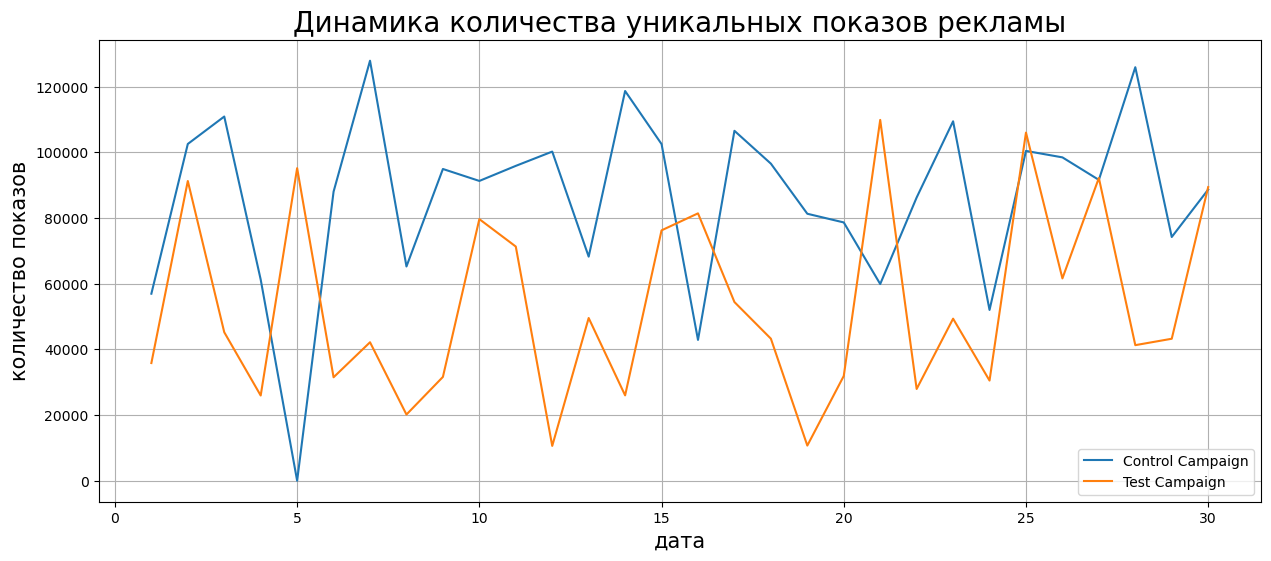

In [23]:
# построим линейный график, чтобы отобразить динамику количества уникальных показов рекламы
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=total, x='date', y='unique_impressions_ad', hue='group')
        
plt.title('Динамика количества уникальных показов рекламы',fontsize = 20)
plt.xlabel('дата', fontsize = 15)
plt.ylabel('количество показов', fontsize = 15)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Как видно на графике, в целом **количество уникальных показов рекламы в тестовой группе ниже, чем в контрольной в период проведения A/B-теста**.

Посмотрим какая стоимость одного уникального показа рекламы в контрольной и тестовой группах.

In [24]:
print('Стоимость одного показа рекламы в контрольной группе', round(control.spend_money.sum()/control.impressions_ad.sum(), 2),\
                                                              'доллара США.')
print('Стоимость одного показа рекламы в тестовой группе', round(test.spend_money.sum()/test.impressions_ad.sum(), 2),\
                                                              'доллара США.')

Стоимость одного показа рекламы в контрольной группе 0.02 доллара США.
Стоимость одного показа рекламы в тестовой группе 0.03 доллара США.


Таким образом, **стоимость одного показа новой рекламы на 50% выше, чем старой**.

Так как интернет-магазин проводил A/B-тест в целях увеличения количества покупок, то **в качестве целевой метрики будем использовать конверсию (Convertion Rate)**. Конверсию будем рассчитывать, как долю оформленных заказов (покупок) от количества уникальных кликов по рекламному баннеру.

Перейдём к построению воронок продаж в контрольной и тестовой группах (будем сравнивать относительные значения). Сначала для каждой группы сформируем таблицу с агрегированными значениями по каждому шагу воронки продаж.

Шаги воронки продаж:
1) unique_impressions_ad - уникальные показы рекламы;
2) clicks_ad - клики по рекламе;
3) searches_on_website - поиск по сайту интернет-магазина;
4) view_on_website - просмотр контента интернет-магазина;
5) add_cart - добавление товаров в корзину;
6) purchase - покупка товаров.

Конверсию каждого шага будем рассчитывать от предыдущего шага.

In [25]:
def create_table_funnel (table):
    
    """Функция для создания таблицы воронки продаж"""
    
    table_funnel = table[['unique_impressions_ad','clicks_ad','searches_on_website','view_on_website',\
                              'add_cart','purchase']].sum()
    table_funnel = pd.DataFrame(table_funnel)
    table_funnel = table_funnel.reset_index()
    table_funnel.columns = ['steps', 'values']

    # рассчитаем конверсию текущего шага от предыдущего
    table_funnel['ratio'] = round(table_funnel['values']/table_funnel['values'].shift(1)*100,2)
    return table_funnel

Сначала построим воронку продаж для контрольной группы.

In [26]:
funnel_control = create_table_funnel(control)
print('Конверсия последнего шага от первого в контрольной группе равна',\
      round(funnel_control.iloc[5,1]/funnel_control.iloc[0,1]*100, 2), '%')
funnel_control

Конверсия последнего шага от первого в контрольной группе равна 0.59 %


,steps,values,ratio
0,unique_impressions_ad,2576503,NaN
1,clicks_ad,154303,5.99
2,searches_on_website,64418,41.75
3,view_on_website,56370,87.51
4,add_cart,37700,66.88
5,purchase,15161,40.21


Теперь построим воронку продаж для тестовой группы.

In [27]:
funnel_test = create_table_funnel(test)
print('Конверсия последнего шага от первого в тестовой группе равна',\
      round(funnel_test.iloc[5,1]/funnel_test.iloc[0,1]*100, 2), '%')
funnel_test

Конверсия последнего шага от первого в тестовой группе равна 0.97 %


,steps,values,ratio
0,unique_impressions_ad,1604747,NaN
1,clicks_ad,180970,11.28
2,searches_on_website,72569,40.10
3,view_on_website,55740,76.81
4,add_cart,26446,47.45
5,purchase,15637,59.13


Получается, что **конверсия последнего шага (purchase - покупка товаров) от первого (unique_impressions_ad - уникальные показы рекламы) в тестовой группе на 64% выше: 0,97% против 0,59% в контрольной**.

Теперь визуализируем воронки продаж, чтобы понять на каких шагах происходит проседание конверсии.

In [28]:
def create_barplot (data_1, data_2, column_1, column_2, total_name, name_1, name_2, ylim_min, ylim_max):
    
    """Функция для построения барплотов (столбчатые диаграммы)"""
    
    plt.figure(figsize=(20, 8))
    plt.suptitle(total_name, fontsize=30)
    plt.tight_layout(h_pad= 30)
    
    ax1 = plt.subplot(1, 2, 1)
    table_left = sns.barplot(x=column_1, y=column_2, data=data_1, errorbar=None)
    plt.bar_label(table_left.containers[0], size=20, label_type='edge')
    plt.title(name_1, fontsize = 25)
    plt.ylim(ylim_min, ylim_max)
    plt.xlabel(' ', fontsize = 20)
    plt.ylabel(' ', fontsize = 20)
    plt.xticks(rotation=45, fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True)

    ax2 = plt.subplot(1, 2, 2, sharey = ax1)
    table_right = sns.barplot(x=column_1, y=column_2, data=data_2, errorbar=None)
    plt.bar_label(table_right.containers[0], size=20, label_type='edge')
    plt.title(name_2, fontsize = 25)
    plt.xlabel(' ', fontsize = 20)
    plt.ylabel(' ', fontsize = 20)
    plt.xticks(rotation=45, fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True)

    plt.tight_layout(h_pad= 10)
    plt.show()

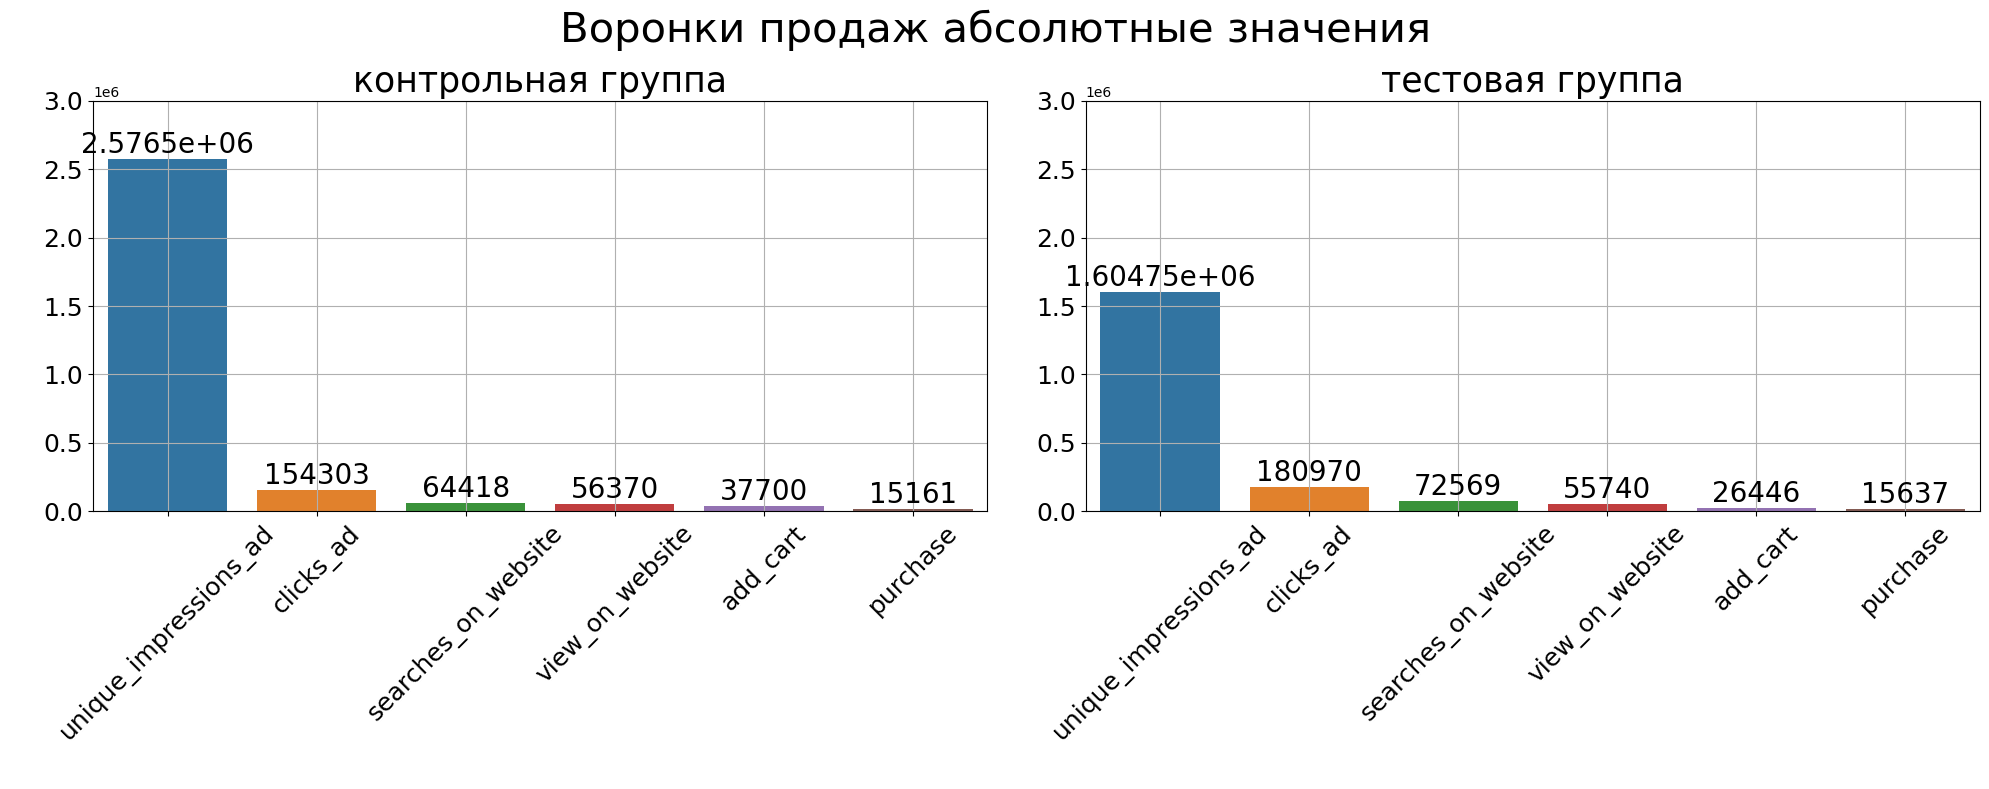

In [29]:
# Построим воронку продаж по абсолютным значениям
create_barplot (funnel_control, funnel_test, 'steps', 'values', 'Воронки продаж абсолютные значения',\
                'контрольная группа', 'тестовая группа', 0, 3000000)


На графиках видно, что **в контрольной группе почти на 40% больше уникальных показов рекламного баннера**, при этом, на остальных шагах воронки продаж абсолютные значения отличаются друг от друга не так значительно. Количество покупок почти равно в двух группах.

Скорее всего, такая разница в количестве уникальных показов рекламы в контрольной и тестовой группах связана со стоимостью стоимость одного показа: в тестовой группе стоимость рекламы на 50% выше, чем в контрольной.

Теперь построим воронку продаж по относительным значениям (конверсия). 

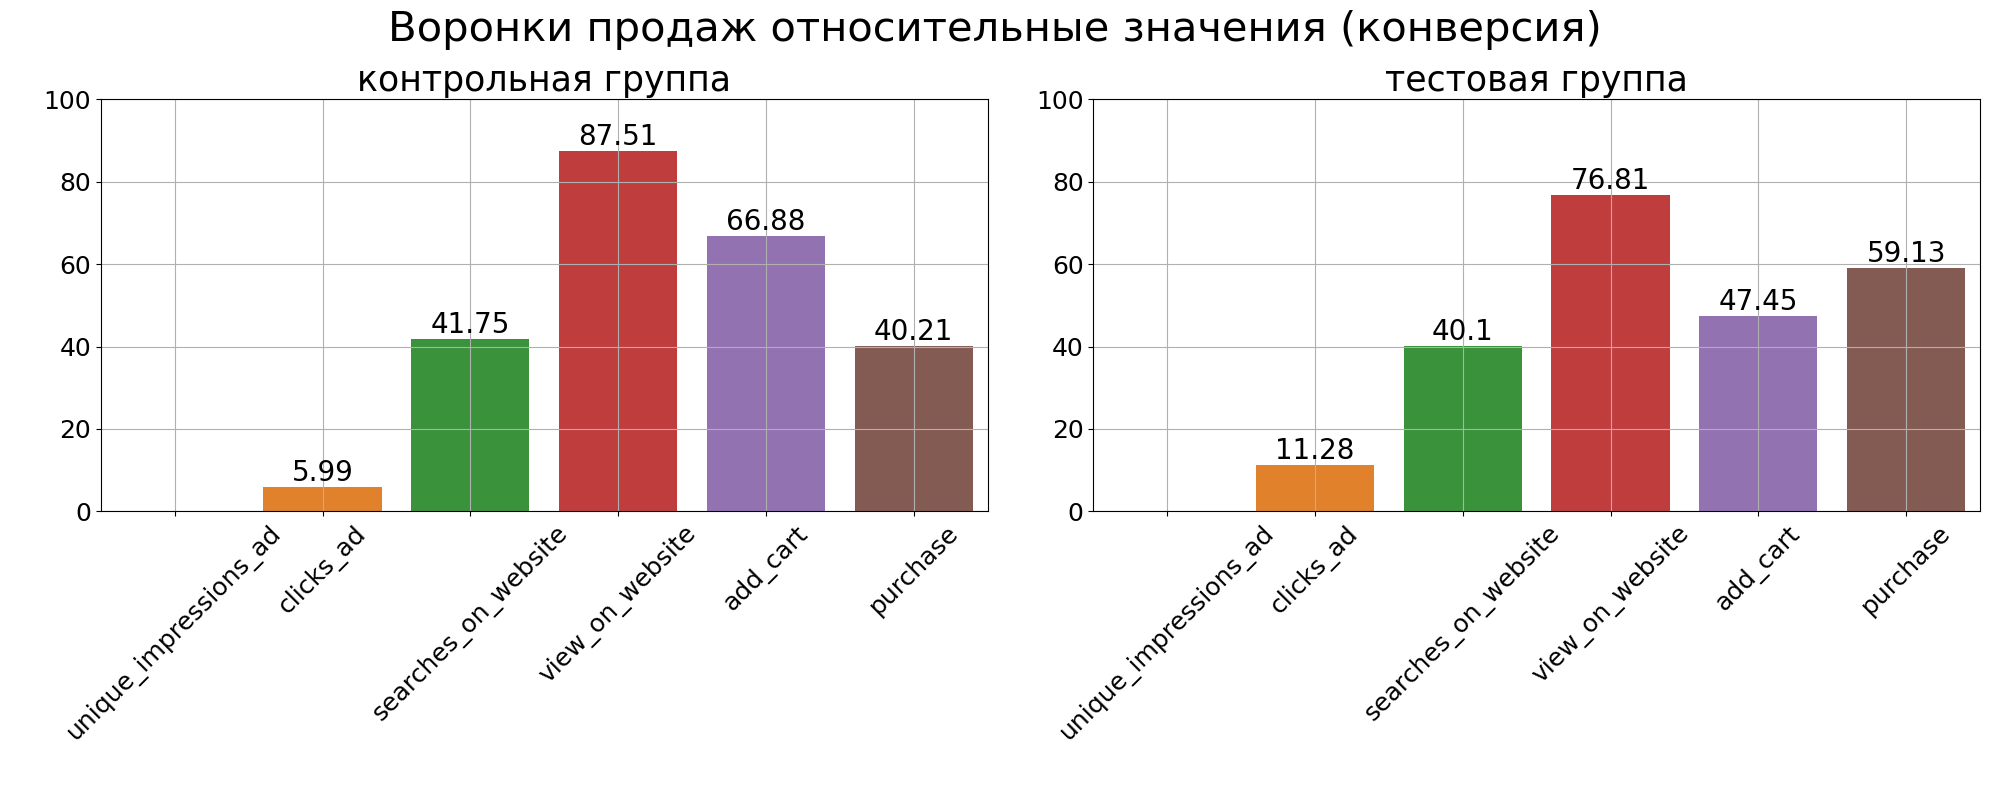

In [30]:
create_barplot (funnel_control, funnel_test, 'steps', 'ratio', 'Воронки продаж относительные значения (конверсия)',\
               'контрольная группа', 'тестовая группа', 0, 100)

Получается, что **с введением нового рекламного баннера конверсия**:
- **снизилась** на шагах:
    - searches_on_website - поиск по сайту интернет-магазина (на 4%);
    - view_on_website - **просмотр контента интернет-магазина (на 12%)**;
    - add_cart - **добавление товаров в корзину (на 29%)**;
    
- **повысилась** на шагах:
    - clicks_ad - **клики по рекламе (на 88%)**;
    - purchase - **покупка товаров (на 47%)**.

Таким образом, **несмотря на то, что конверсия в покупку выросла на 47% от предыдущего шага (добавление в корзину) и на 64% от первого шага** *(конверсия последнего шага от первого в контрольной группе равна 0.59 %, в тестовой - 0.97%)*, **стоит обратить внимание на выявленные слабые места при прохождении пользователями воронки продаж**.

Так, **по какой-то причине пользователи стали, почти на 30% меньше, добавлять товары в корзину, на 12% - просматривать контент интернет-магазина, на 4% - использовать поиск по сайту**.

## Статистические гипотезы.

Чтобы понять есть ли статистически значимая разница в росте конверсии покупки товаров от количества уникальных показов нового рекламного баннера, применим статический критерий.

Так как конверсионные метрики описываются распределением Бернулли, для анализа их изменений можно использовать Z-тест для пропорций. Чтобы рассчитать z-cтатистику, нужно значение конверсии и размер выборки для каждой из групп.

Сформулируем нулевую и альтернативную гипотезы:
- H0: **конверсия из количества уникальных показов рекламы в покупку не увеличилась** (то есть p_control >= p_test);
- H1: **конверсия из количества уникальных показов рекламы в покупку стала выше** (то есть p_control < p_test).

Уровень статистической значимости (альфа) установим как 5%. Так как в альтернативной гипотезе мы предположили, что рост конверсии в тестовой группе имеет статистическую значимость, то в качестве параметра z-теста будем использовать значение 'smaller'.

In [31]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

stat, p_value = proportions_ztest([sum(control['purchase']), sum(test['purchase'])],\
                                  [sum(control['unique_impressions_ad']), sum(test['unique_impressions_ad'])],\
                                  alternative='smaller')

print(p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.0
Отвергаем нулевую гипотезу


Таким образом, **статический критерий показал статистическую разницу между конверсиями в контрольной и тестовой группах, то есть конверсия с введением нового рекламного баннера увеличилась**.

## Вывод.

С введением нового рекламного баннера пользователи стали больше покупать (конверсия в тестовой группе выше на 64%, чем в контрольной), хотя количество уникальных показов рекламы снизилось на 40%. Также статистический критерий показал увеличение конверсии из уникальных показов рекламы в покупки.

При принятии решения о раскатке фичи (введении нового рекламного баннера для всех пользователей интернет-магазина) стоит учитывать следующие моменты.

    1. Несмотря на то, что конверсия в покупку выросла на 47% от предыдущего шага (добавление в корзину) и на 64% от первого шага (уникальные показы рекалмы) *(конверсия последнего шага от первого в контрольной группе равна 0.59 %, в тестовой - 0.97%)*, стоит обратить внимание на выявленные слабые места при прохождении пользователями воронки продаж.

    Так, по какой-то причине пользователи стали, почти на 30% меньше, добавлять товары в корзину, на 12% - просматривать контент интернет-магазина, на 4% - использовать поиск по сайту.

    2. В контрольной группе почти на 40% больше уникальных показов рекламного баннера, при этом, на остальных шагах воронки продаж абсолютные значения отличаются друг от друга не так значительно. Количество покупок почти равно в двух группах.

    Скорее всего, такая разница в количестве уникальных показов рекламы в контрольной и тестовой группах связана со стоимостью стоимость одного показа: в тестовой группе стоимость рекламы на 50% выше, чем в контрольной.
    
    Стоит рассмотреть вопрос увеличения количества уникальных показов рекламы, что, вполне возможно, стимулирует рост количества покупок.

    3. Стоит обратить внимание на качество и полноту сбора данных при проведении A/B-теста (так по контрольной группе за один день (05 августа) отсутствует часть данных, что, возможно, искажает результаты теста).